In [553]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [554]:
df = pd.read_csv("raw_data/bank_test.csv")
df

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [555]:
#função que determina outliers
#(https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414)
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range, upper_range

###Limpeza de Id, Location e Age

In [556]:
df1 = df.copy()
df1

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,45206,38.0,administrator,married,secondary,NaN,no,1767.0,yes,no,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,45207,39.0,housemaid,married,primary,Lisboa,no,562.0,no,no,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,45208,46.0,technician,married,secondary,Amadora,no,0.0,no,no,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,45209,NaN,technician,single,secondary,Braga,no,1195.0,yes,no,cellular,19,nov,187,6.0,188,9.0,failure


In [557]:
#remoção da coluna 'location' e 'id'
df1 = df1.drop("location", axis=1)
df1 = df1.drop("id", axis=1)

###Substituição simples nas colunas housing, loan, default, monhts, y


In [558]:
#substituindo 'sim' e 'não' pelos valores inteiros 1 e 0 para facilitar a manipulação dos dados
df2 = df1.copy()
for col in df2:
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})

C:\Users\chase\AppData\Local\Temp\ipykernel_3244\1315240840.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2[col] = df2[col].replace({'yes': np.int16(1), 'no': np.int16(0), 'y': np.int16(1), 'n': np.int16(0)})


In [559]:
#trocar os nomes dos meses ('jan', 'feb', etc.) pela sua respectiva posição no ano
# months = {'aug': 8,'may': 5,'oct': 10,'nov': 11,'jul': 7,'jun': 6,'apr': 4,'jan': 1,'feb': 2,'sep': 9,'mar': 3,'dec': 12}
# df2["month"] = df2["month"].replace(months)
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26.0,self-employed,single,tertiary,0,-101.0,0,1,cellular,29,jan,172,1.0,-1,0.0,unknown
1,47.0,technician,married,secondary,0,1167.0,1,0,cellular,2,feb,139,3.0,73,2.0,success
2,35.0,self-employed,married,tertiary,0,2427.0,0,0,cellular,12,jul,210,3.0,158,7.0,other
3,54.0,technician,divorced,secondary,0,NaN,0,0,cellular,30,jan,86,1.0,-1,0.0,unknown
4,27.0,blue-collar,single,secondary,0,-208.0,1,0,unknown,21,may,127,2.0,-1,0.0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5206,38.0,administrator,married,secondary,0,1767.0,1,0,cellular,12,nov,893,7.0,-1,0.0,unknown
5207,39.0,housemaid,married,primary,0,562.0,0,0,cellular,12,aug,234,2.0,-1,0.0,unknown
5208,46.0,technician,married,secondary,0,0.0,0,0,unknown,20,jun,625,1.0,-1,0.0,unknown
5209,NaN,technician,single,secondary,0,1195.0,1,0,cellular,19,nov,187,6.0,188,9.0,failure


###Transformação de 'pdays' e 'previous' em categóricas

In [560]:
df3 = df2   .copy()
df3["pdays"] = df3['pdays'].apply(lambda x: 0 if x < 50 else 1) #0 se pdays < 50 e 1 se pdays >= 50
df3["previous"] = df3['previous'].apply(lambda x: 0 if x < 8 else 1) #0 se previous < 8 e 1 se previous >= 8

###Plotagem de gráficos para conferir resultados da limpeza

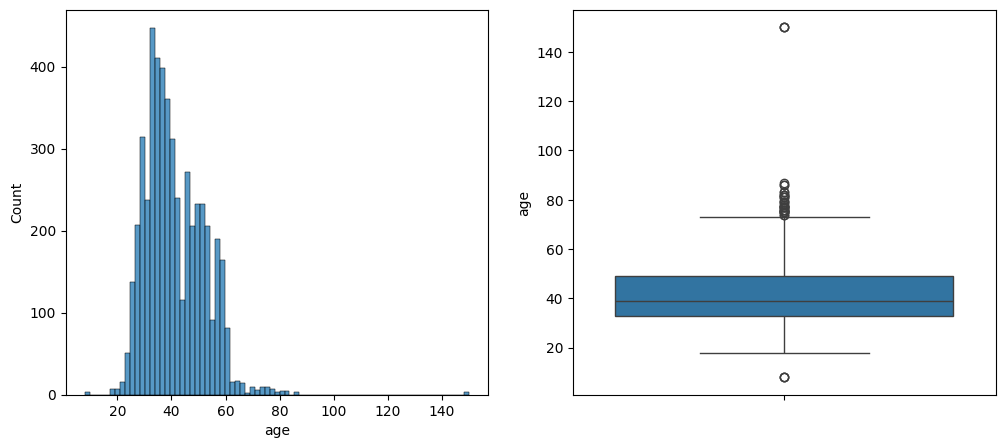

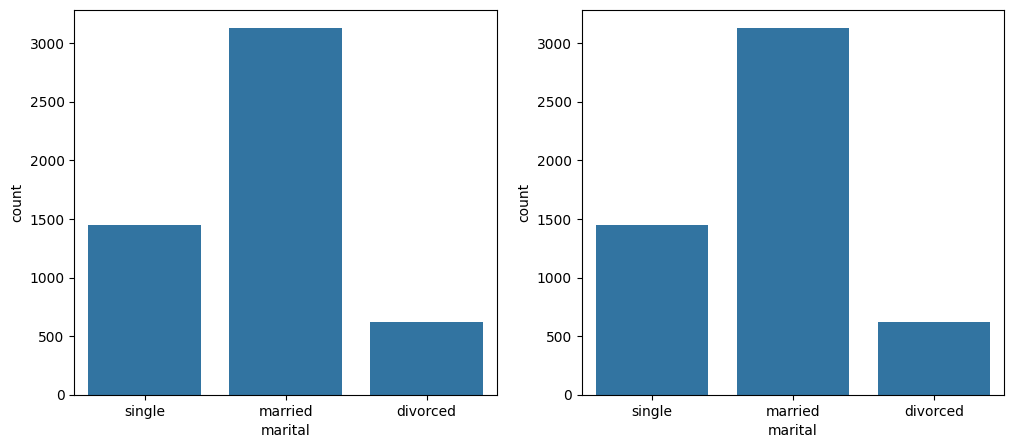

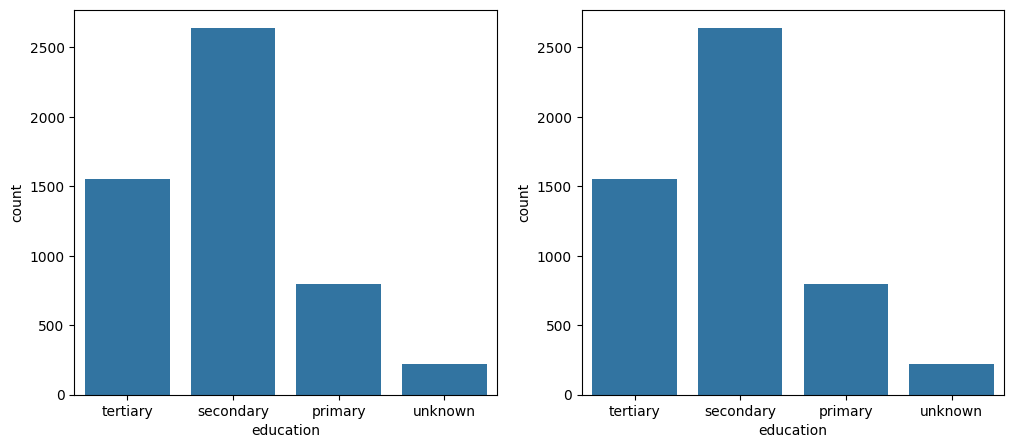

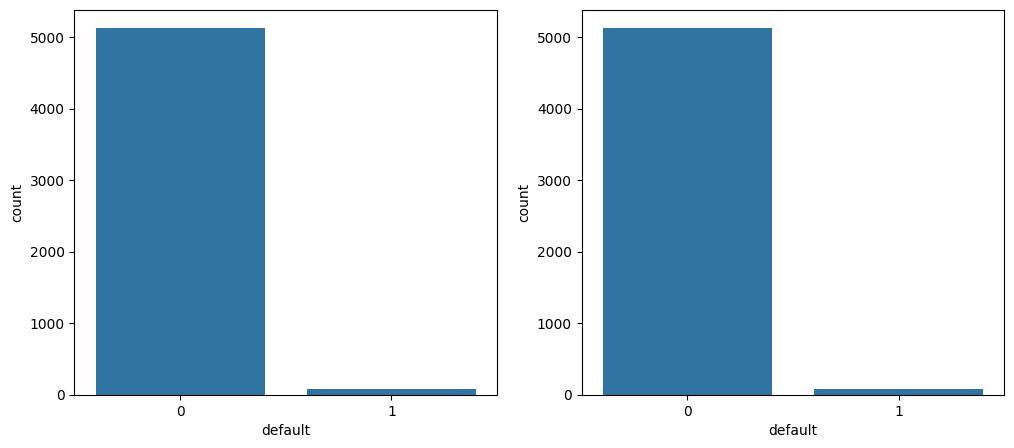

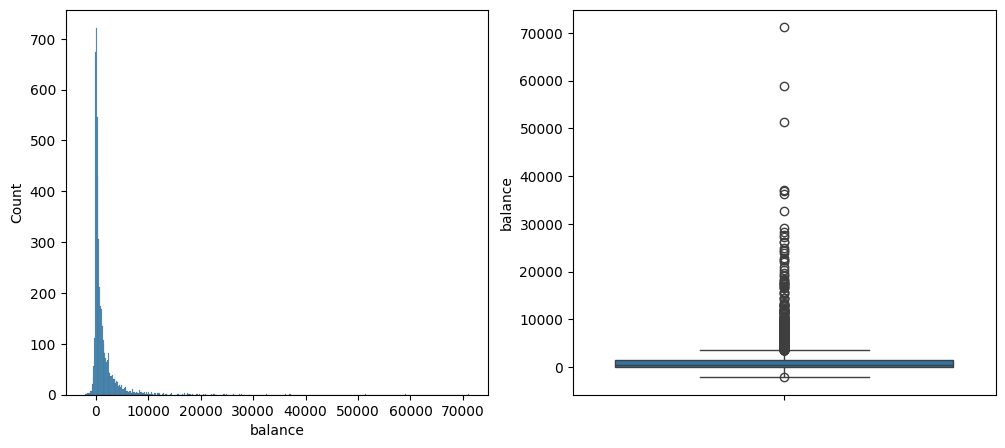

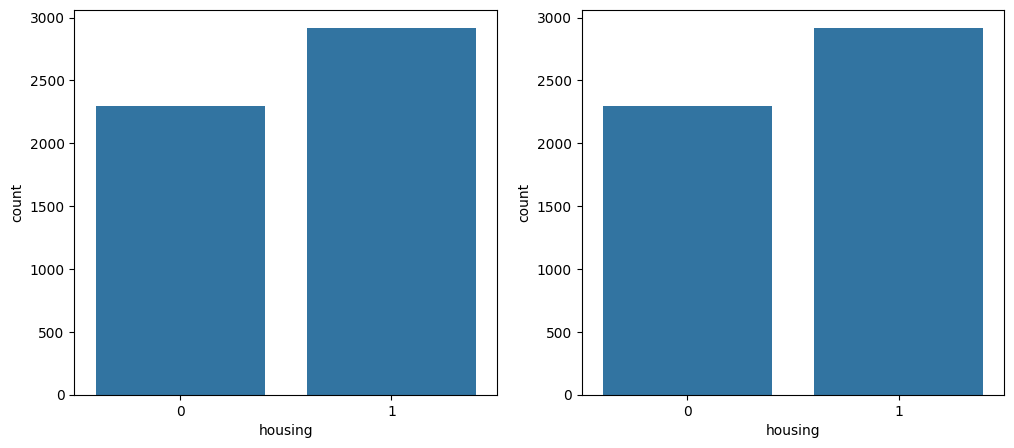

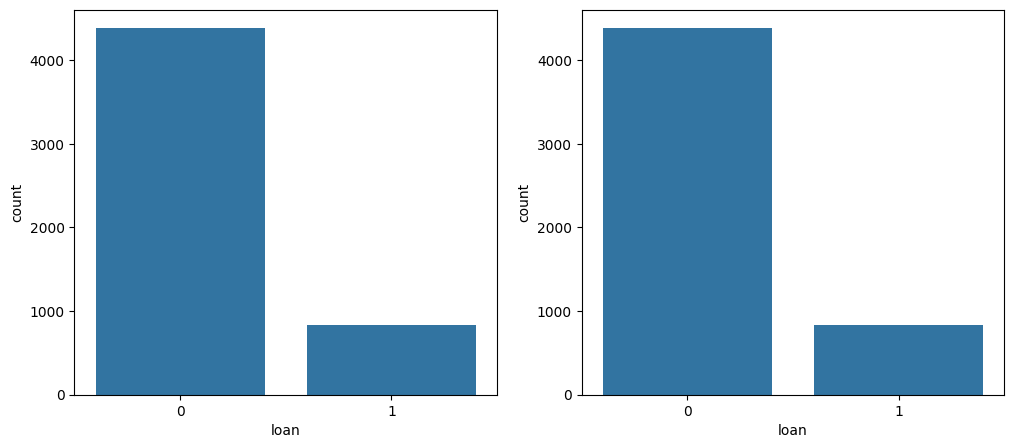

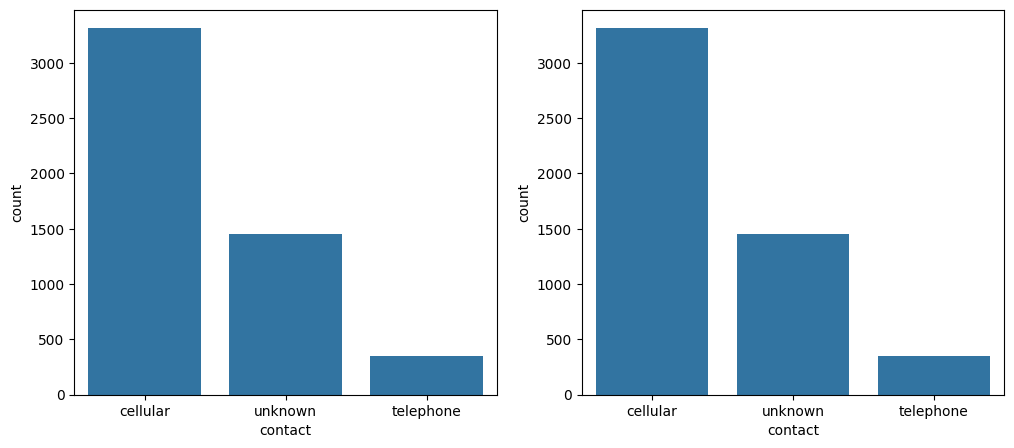

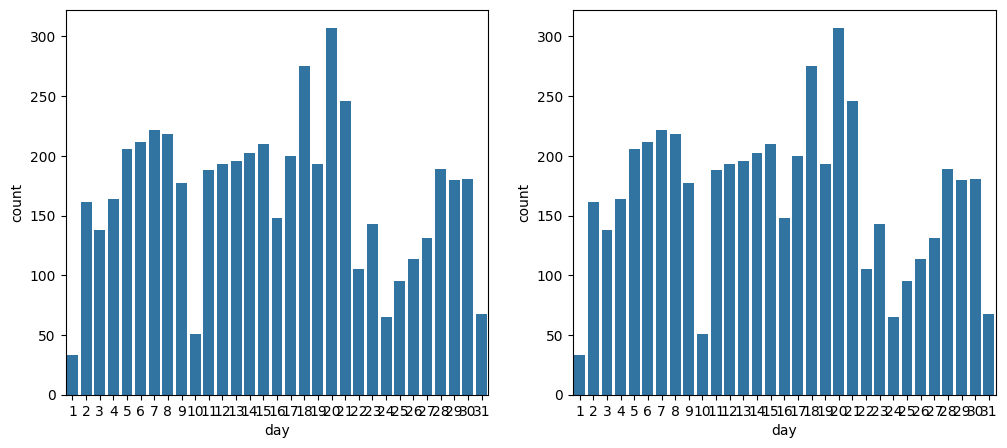

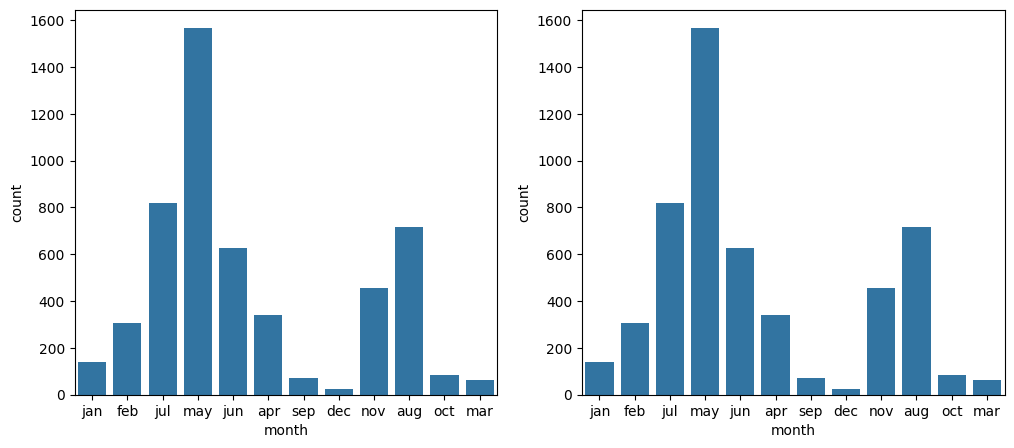

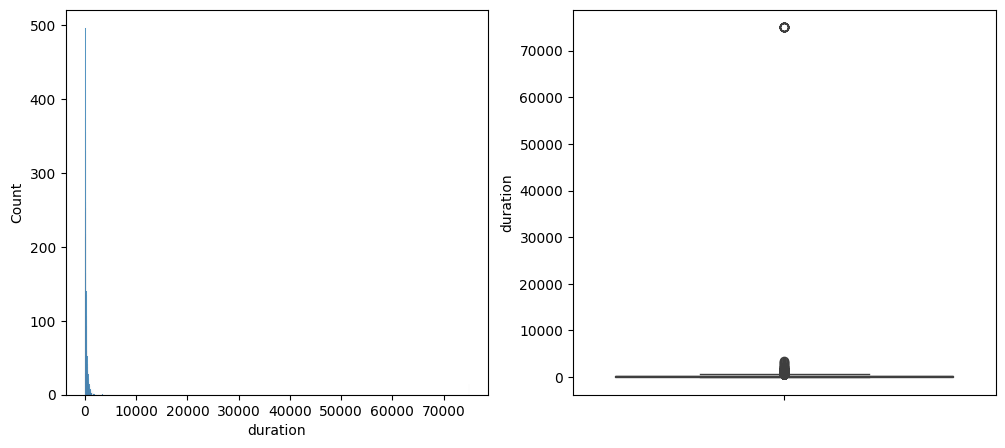

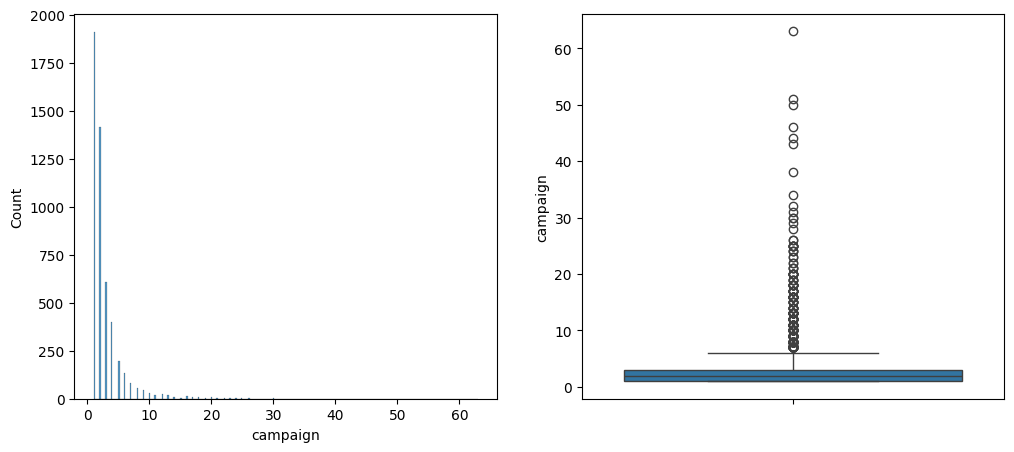

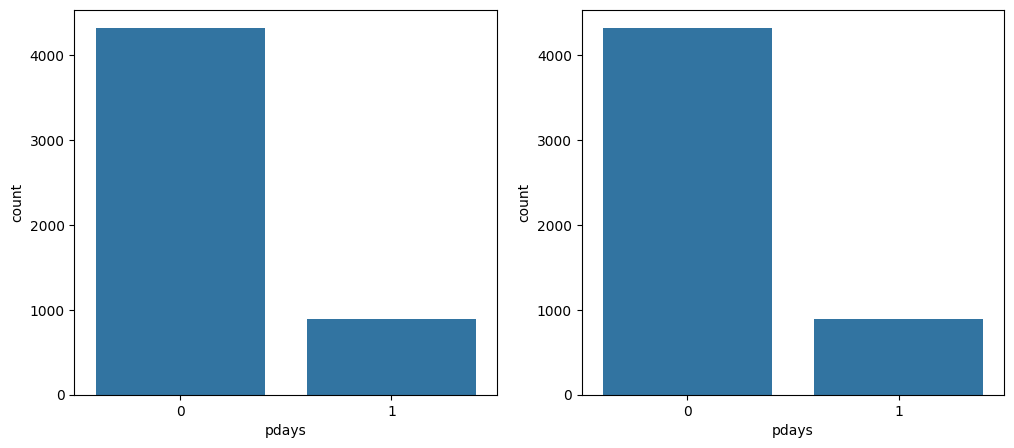

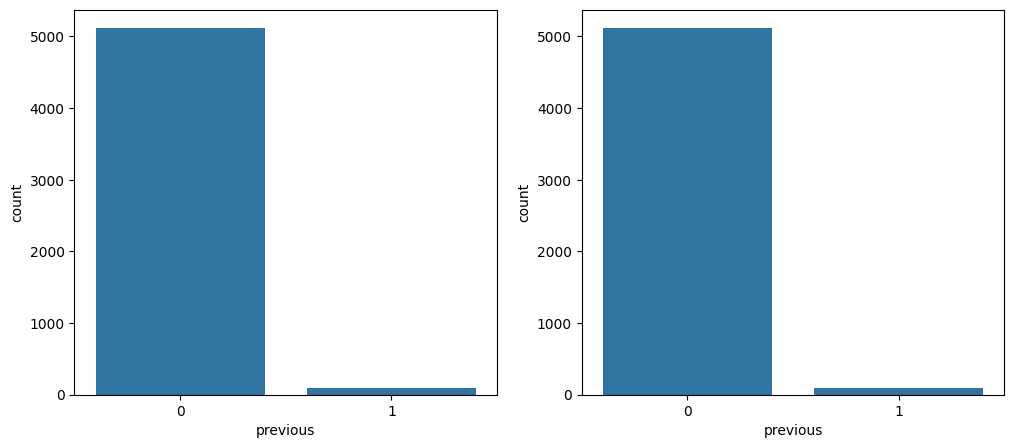

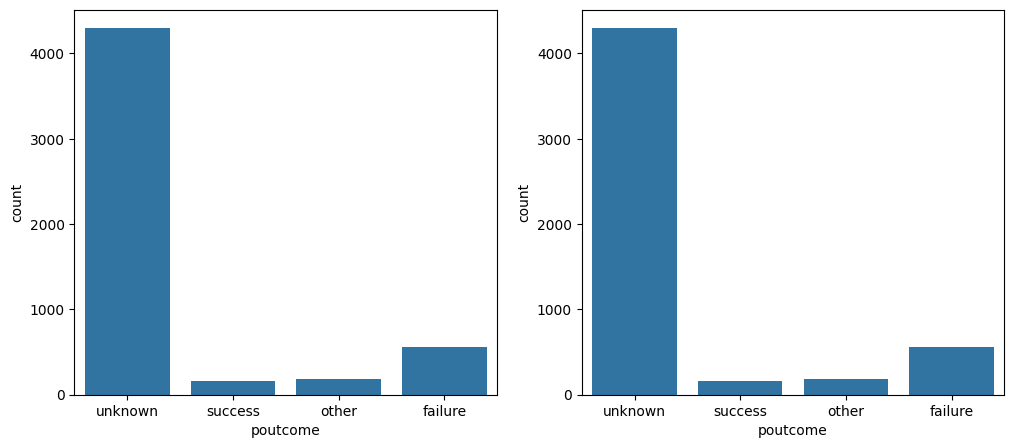

In [561]:
#plotagem de diversos gráficos para a análise exploratória
categoricas = np.array(("marital","education","day","month","pdays","previous","location","default","housing","loan","contact","poutcome"))
numericas = np.array(("age","balance","duration","campaign"))

for feature in (df3.columns):
  if feature in categoricas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.countplot(data = df3, x = feature)
    plt.subplot(1,2,2)
    sns.countplot(data = df3, x = feature)
    plt.show()
  elif feature in numericas:
    plt.figure(figsize = (12,5))
    plt.subplot(1,2,1)
    sns.histplot(data = df3, x = feature)
    plt.subplot(1,2,2)
    sns.boxplot(data = df3, y = feature)
    plt.show()

###Lidando com dados ausentes

In [562]:
df3.isna().sum()

age          166
job          156
marital       19
education      0
default        0
balance      247
housing        0
loan           0
contact       90
day            0
month          0
duration       0
campaign     189
pdays          0
previous       0
poutcome       0
dtype: int64

In [563]:
df4 = df3.copy()

age_by_marital = df4.groupby('marital')["age"].mean()
age_by_marital
df4["age"] = df4.apply(lambda x: age_by_marital[x["marital"]] if pd.isna(x["age"]) and not pd.isna(x['marital']) else x["age"], axis=1)

In [564]:
age_mean = df4['age'].mean()
df4['age'] = df4['age'].fillna(age_mean)

#problema com a função mode/median

job_mode = df4['job'].mode()
df4['job'] = df4['job'].fillna('blue-collar')
# job_by_balance = df4.groupby('balance')["job"].median()
# df4["job"] = df4.apply(lambda x: job_by_balance[x["balance"]] if pd.isna(x["job"]) and not pd.isna(x['balance']) else x["job"], axis=1)

marital_mode = df4['marital'].mode()
df4['marital'] = df4['marital'].fillna('married')
# marital_by_age = df4.groupby('age')["marital"].median()
# df4["marital"] = df4.apply(lambda x: marital_by_age[x["age"]] if pd.isna(x["marital"]) else x["marital"], axis=1)

# balance_mean = df4['balance'].mean()
# df4['balance'] = df4['balance'].fillna(balance_mean)
balance_by_education = df4.groupby('education')["balance"].mean()
df4["balance"] = df4.apply(lambda x: balance_by_education[x["education"]] if pd.isna(x["balance"]) else x["balance"], axis=1)

contact_mode = df4['contact'].mode()
df4['contact'] = df4['contact'].fillna('cellular')

campaign_mean = df4['campaign'].mean()
df4['campaign'] = df4['campaign'].fillna(campaign_mean)

df4.isna().sum() #todos os NaN foram tratados

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

###Exportando df limpo

In [565]:
df_final = df4.copy()
df_final.to_csv('C:\\Users\\chase\\Documents\\GitHub\\ProjetoFinalTA\\df_teste_final.csv', index=False)